### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Load Data

In [2]:
train = pd.read_csv('C:/Users/HP/Kaggle competetions/Santander Customer Transaction Prediction/datasets/train.csv')
test = pd.read_csv('C:/Users/HP/Kaggle competetions/Santander Customer Transaction Prediction/datasets/test.csv')

In [3]:
print(train.shape)
test.shape

(200000, 202)


(200000, 201)

In [4]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


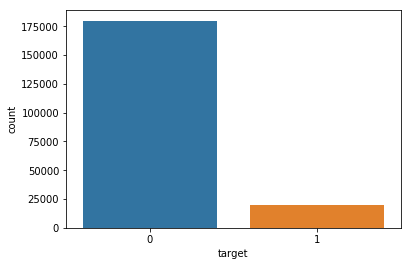

In [5]:
sns.countplot(x='target', data=train)
plt.show()

In [6]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
trainX, valX, trainY, valY = train_test_split(train.iloc[:, 2:], train['target'], test_size=0.3, random_state=22)
print(trainX.shape)

(140000, 200)


In [14]:
param_grid = {
    'bootstrap':[True],
    'max_depth': [20, 30, 40],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}

In [16]:
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator = rfc, param_grid= param_grid, 
                         cv = 5, verbose=1,n_jobs = -1)

rfc_grid.fit(trainX, trainY)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 79.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40], 'min_samples_split': [8, 10, 12], 'n_estimators': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [17]:
rfc_grid.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'min_samples_split': 12,
 'n_estimators': 10}

### Important Features